# Pacotes

In [1]:
import os
import random
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

# Definir a seed para reprodutibilidade
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)

initializer = tf.keras.initializers.GlorotUniform(seed=seed)

tf.config.experimental.enable_op_determinism()


# Importa Dados

In [ ]:
# Carregar os dados
data = pd.read_csv("PETR4.SA.csv")

In [ ]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-14,29.170000,29.670000,28.719999,29.450001,23.936726,50745400
1,2021-01-15,29.049999,29.080000,28.030001,28.120001,22.855711,80673300
2,2021-01-18,28.309999,28.850000,28.010000,28.070000,22.815071,68855700
3,2021-01-19,28.480000,28.860001,27.639999,28.690001,23.319004,61656000
4,2021-01-20,28.950001,29.120001,28.110001,28.209999,22.928862,60306200
...,...,...,...,...,...,...,...
244,2022-01-10,27.990000,28.240000,27.719999,28.010000,28.010000,37455200
245,2022-01-11,28.100000,29.070000,27.850000,28.990000,28.990000,62315600
246,2022-01-12,28.950001,29.910000,28.950001,29.719999,29.719999,81378200
247,2022-01-13,29.530001,30.629999,29.500000,30.320000,30.320000,76717500


# Cria DF

In [ ]:
# Criar as features e o target
fechamento = data["Close"].values
fechamento_anterior = data['Close'].shift(-1)

data_analise = pd.DataFrame({"fechamento": fechamento, "fechamento_anterior": fechamento_anterior})
data_analise.dropna(inplace=True)

In [ ]:
data_analise

,fechamento,fechamento_anterior
0,29.450001,28.120001
1,28.120001,28.070000
2,28.070000,28.690001
3,28.690001,28.209999
4,28.209999,27.549999
...,...,...
243,28.180000,28.010000
244,28.010000,28.990000
245,28.990000,29.719999
246,29.719999,30.320000


# Pré-processamento

In [ ]:
# Normalizar os dados
scaler = MinMaxScaler()
X = scaler.fit_transform(data_analise["fechamento_anterior"].values.reshape(-1, 1))
Y = scaler.fit_transform(data_analise["fechamento"].values.reshape(-1, 1))

In [ ]:
# Dividir em conjunto de treinamento e teste
train_size = 150
X_train, X_test = X[:train_size], X[train_size:]
Y_train, Y_test = Y[:train_size], Y[train_size:]

In [ ]:
# Reshape dos dados para RNN
x_train_rnn = X_train.reshape(10, 15, 1)
y_train_rnn = Y_train.reshape(10, 15, 1)
# Test set
x_test_rnn = X_test.reshape(1, 98, 1)
y_test_rnn = Y_test.reshape(1, 98, 1)

In [ ]:
X.shape

(248, 1)

# Modelo LSTM

In [ ]:
# Definir a semente para reprodutibilidade
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

In [ ]:
# Criar o modelo LSTM
model = Sequential([
    LSTM(units=20, activation = 'relu', return_sequences=True, input_shape=(15, 1)),
    Dense(units=10, activation = 'linear'),
    Dense(1)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Compila e Treina

In [ ]:
learning_rate = 0.0001
optimizer = Adam(learning_rate=learning_rate)

# Compilar modelo
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Treinar o modelo
history = model.fit(x_train_rnn, y_train_rnn, epochs=1000, verbose=1)

Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.1628
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.1617
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.1607
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.1597
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.1587
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.1577
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.1568
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.1558
Epoch 9/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.1548
Epoch 10/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.1538
Epoch 11/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.1528
Epoch 12/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.1518
Epoch 13/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - loss: 0.1509
Epoch 14/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.1499
Epoch 15/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.1489
Epoch

# Predição

In [ ]:
# Avaliar o modelo
Y_train_pred = model.predict(x_train_rnn)
Y_test_pred = model.predict(x_test_rnn)

# Desnormalizar os dados - previstos
Y_train_pred = Y_train_pred.reshape(Y_train_pred.shape[0],Y_train_pred.shape[1])
Y_train_pred = scaler.inverse_transform(Y_train_pred)

Y_test_pred = Y_test_pred.reshape(Y_test_pred.shape[0],Y_test_pred.shape[1])
Y_test_pred = scaler.inverse_transform(Y_test_pred)

# Desnormalizar os dados - valores reais
y_train_real = y_train_rnn.reshape(y_train_rnn.shape[0], y_train_rnn.shape[1])
y_test_real = y_test_rnn.reshape(y_test_rnn.shape[0], y_test_rnn.shape[1])

y_train_real = scaler.inverse_transform(y_train_real)
y_test_real = scaler.inverse_transform(y_test_real)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


In [ ]:
np.ravel(Y_test_pred)

array([25.061035, 26.250177, 27.002628, 27.776585, 28.22119 , 28.111704,
       27.879877, 27.486357, 27.049358, 26.736975, 26.00135 , 25.632824,
       25.329765, 25.426838, 25.421906, 25.591213, 25.667332, 25.357735,
       25.04086 , 24.998951, 25.193937, 25.676594, 26.074871, 26.45345 ,
       26.67402 , 26.964254, 27.11709 , 27.464846, 27.972347, 28.55094 ,
       28.717028, 28.795732, 28.998575, 29.198885, 29.437155, 29.618933,
       29.71312 , 29.716581, 29.2071  , 28.978125, 28.445143, 27.964115,
       28.261532, 28.427214, 28.55516 , 28.75724 , 28.300554, 28.245787,
       27.819326, 27.217827, 26.731346, 26.484968, 26.506968, 26.48462 ,
       26.497465, 26.701975, 26.961283, 26.934734, 26.895811, 26.714186,
       26.658527, 27.089941, 27.609081, 28.409397, 28.634937, 29.105005,
       29.422743, 29.69007 , 29.439075, 29.346626, 29.297844, 29.41016 ,
       29.487629, 29.521849, 29.666601, 29.712944, 29.623875, 29.613821,
       29.74074 , 29.599222, 29.203014, 28.91869 , 

In [ ]:
from sklearn.metrics import r2_score

r2_score(np.ravel(y_test_real), np.ravel(Y_test_pred))

0.8543702571965525

# Gráfico

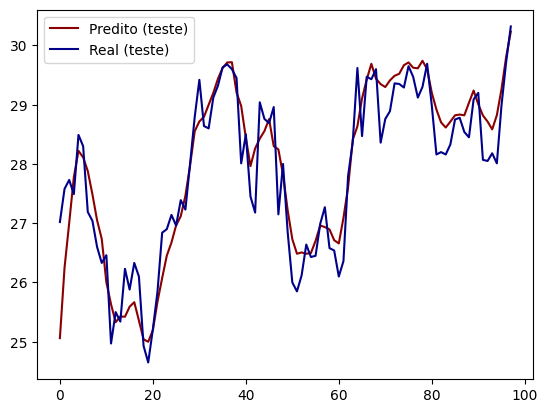

In [ ]:
# Plotar resultados
plt.plot(np.ravel(Y_test_pred), label='Predito (teste)', color='darkred')
plt.plot(np.ravel(y_test_real), label='Real (teste)', color='darkblue')
plt.legend()
plt.show()